In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Carregue os dados do arquivo CSV
dados = pd.read_csv('modelo.csv')

# Descarte colunas não necessárias
dados = dados.drop(['Timestamp', 'nome_arquivo'], axis=1)

# Converta colunas não numéricas para valores numéricos
label_encoder = LabelEncoder()
dados['SSID'] = label_encoder.fit_transform(dados['SSID'])
dados['BSSID'] = label_encoder.fit_transform(dados['BSSID'])

# Separe as features (X) e os rótulos (y)
X = dados.drop('indice_agrupamento', axis=1)
y = dados['indice_agrupamento']

# Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crie o modelo de rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))  # 7 é o número de índices agrupados

# Compile o modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treine o modelo e obtenha o histórico
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Avalie o modelo
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Acurácia do modelo: {accuracy}')


Epoch 1/50
52/52 [==============================] - 1s 8ms/step - loss: 1.9291 - accuracy: 0.1709 - val_loss: 1.8400 - val_accuracy: 0.1759
Epoch 2/50
52/52 [==============================] - 0s 3ms/step - loss: 1.8000 - accuracy: 0.2120 - val_loss: 1.7933 - val_accuracy: 0.2145
Epoch 3/50
52/52 [==============================] - 0s 4ms/step - loss: 1.7513 - accuracy: 0.2343 - val_loss: 1.7604 - val_accuracy: 0.2193
Epoch 4/50
52/52 [==============================] - 0s 3ms/step - loss: 1.7182 - accuracy: 0.2403 - val_loss: 1.7370 - val_accuracy: 0.2169
Epoch 5/50
52/52 [==============================] - 0s 3ms/step - loss: 1.6861 - accuracy: 0.2820 - val_loss: 1.7121 - val_accuracy: 0.1904
Epoch 6/50
52/52 [==============================] - 0s 3ms/step - loss: 1.6566 - accuracy: 0.2802 - val_loss: 1.6879 - val_accuracy: 0.2361
Epoch 7/50
52/52 [==============================] - 0s 4ms/step - loss: 1.6303 - accuracy: 0.3007 - val_loss: 1.6761 - val_accuracy: 0.2386
Epoch 8/50
52/52 [==

AttributeError: 'Sequential' object has no attribute 'predict_classes'

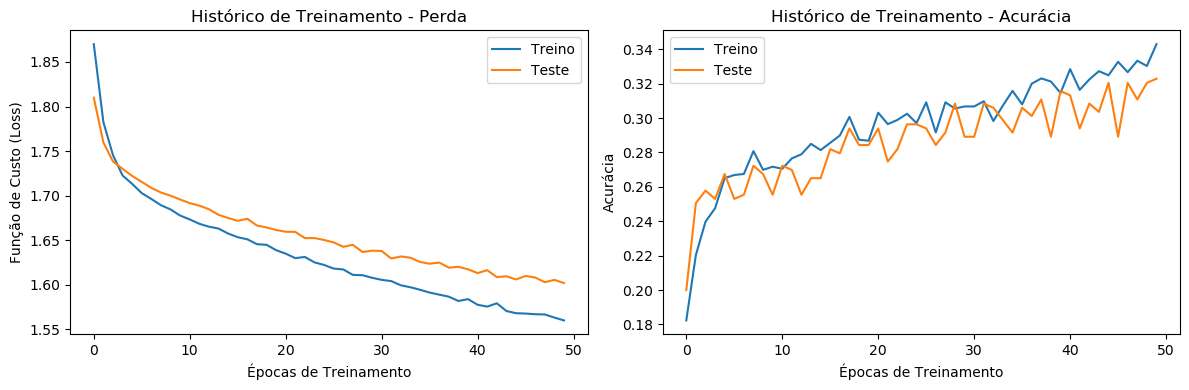

In [29]:
# Plotar gráfico de perda (loss) e acurácia
plt.figure(figsize=(12, 4))

# Gráfico de perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Teste')
plt.title('Histórico de Treinamento - Perda')
plt.ylabel('Função de Custo (Loss)')
plt.xlabel('Épocas de Treinamento')
plt.legend()

# Gráfico de acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Teste')
plt.title('Histórico de Treinamento - Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Épocas de Treinamento')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
model.save('modelo_treinado.h5')

/home/isabelleserique/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
import joblib
# Salvar o LabelEncoder
joblib.dump(label_encoder, 'label_encoder.joblib')

# Salvar o StandardScaler
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']